<a href="https://colab.research.google.com/github/Storm00212/Electromagnetics/blob/main/Maxwell's_equations_reattempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib

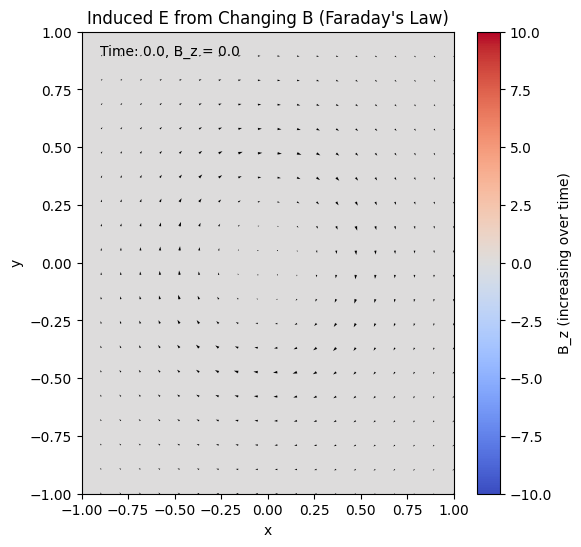

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Grid setup for 2D visualization
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

# Parameters
R = 0.5  # Radius of the region with uniform B
dBdt = 1.0  # Rate of change of B (constant for simplicity)

# Function to compute induced E and B at time t
def get_fields(t):
    Bz = dBdt * t  # Increasing B_z over time

    # Bz array (uniform inside R, zero outside)
    Bz_array = np.zeros_like(r)
    Bz_array[r < R] = Bz

    # Induced E_phi (azimuthal component) from Faraday's law
    E_phi = np.zeros_like(r)
    inside = r < R
    E_phi[inside] = - (r[inside] / 2) * dBdt
    outside = r >= R
    E_phi[outside] = - (R**2 / (2 * r[outside])) * dBdt

    # Convert to Cartesian Ex, Ey
    Ex = -E_phi * np.sin(theta)
    Ey = E_phi * np.cos(theta)

    return Ex, Ey, Bz_array, Bz

# Set up the figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_title('Induced E from Changing B (Faraday\'s Law)')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Color map for Bz (out of page)
pcm = ax.pcolormesh(X, Y, np.zeros_like(X), cmap='coolwarm', shading='auto', vmin=-10, vmax=10)
plt.colorbar(pcm, ax=ax, label='B_z (increasing over time)')

# Quiver for E field vectors
quiver = ax.quiver(X, Y, np.zeros_like(X), np.zeros_like(Y), color='black', scale=20)

# Time text
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

# Update function for animation
def update(frame):
    t = frame / 10.0  # Scale time for slower animation
    Ex, Ey, Bz_array, Bz = get_fields(t)

    # Update Bz color map
    pcm.set_array(Bz_array.ravel())

    # Update E quiver
    quiver.set_UVC(Ex, Ey)

    # Update time text
    time_text.set_text(f'Time: {t:.1f}, B_z = {Bz:.1f}')

    return pcm, quiver, time_text

# Create animation
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=False)

# Display animation in Jupyter (as HTML5 video)
HTML(ani.to_html5_video())